<a href="https://colab.research.google.com/github/hhuang45/OmicSelector/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Hierarchical Clustering...


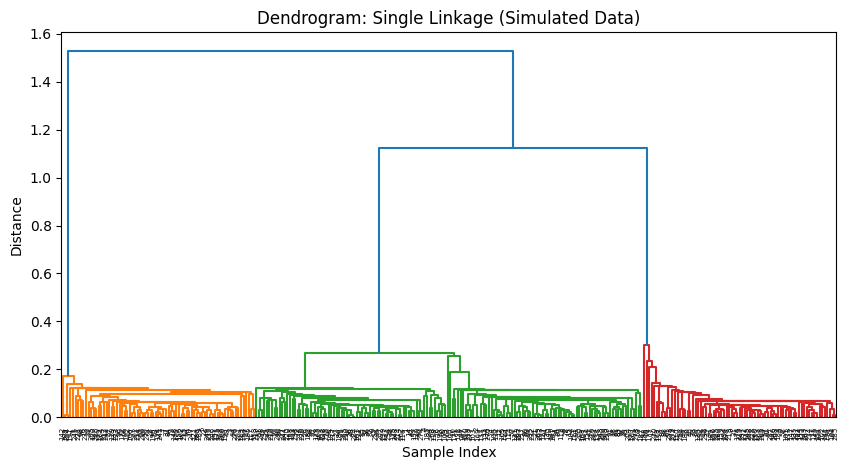

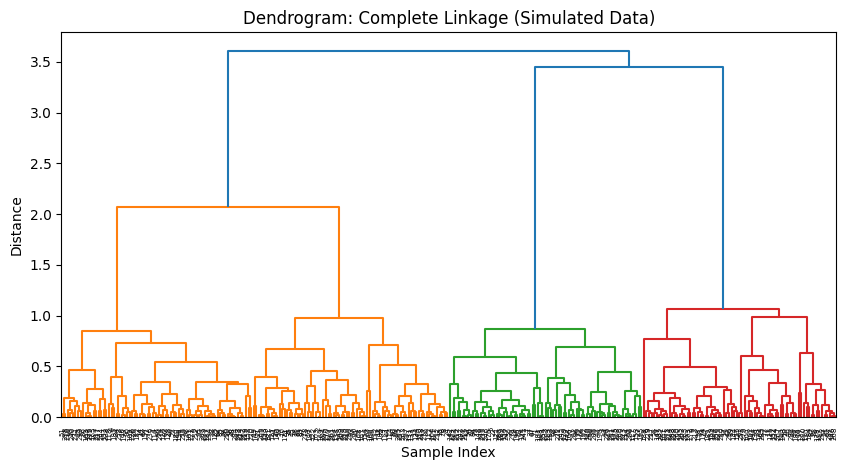

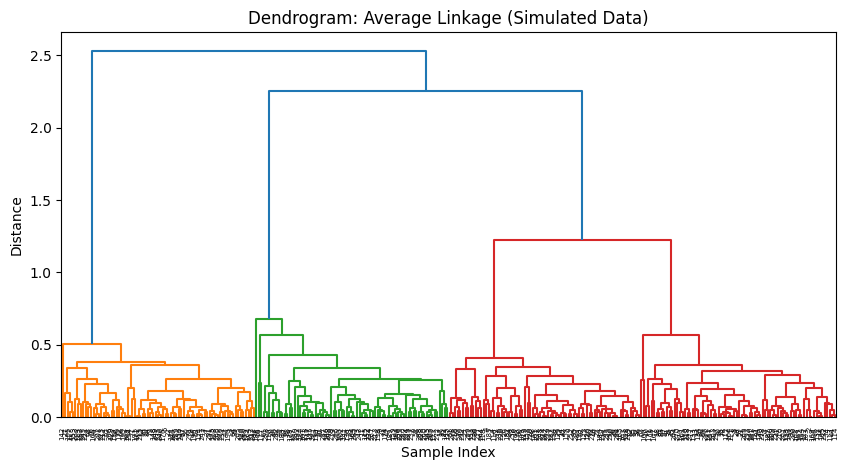

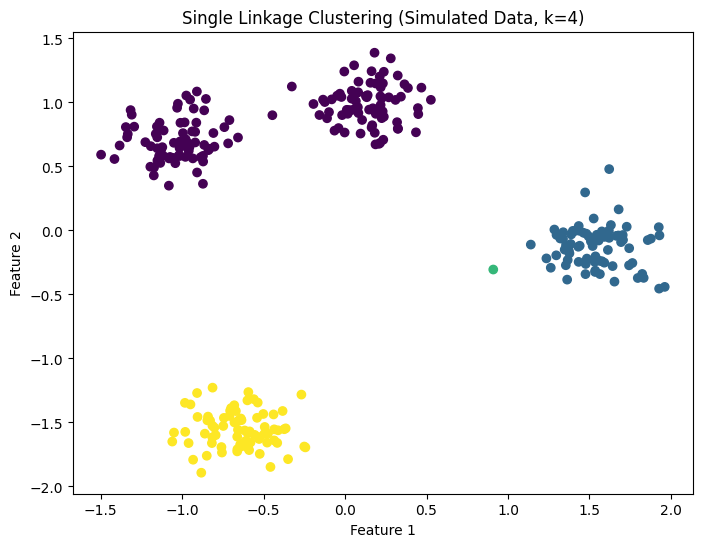

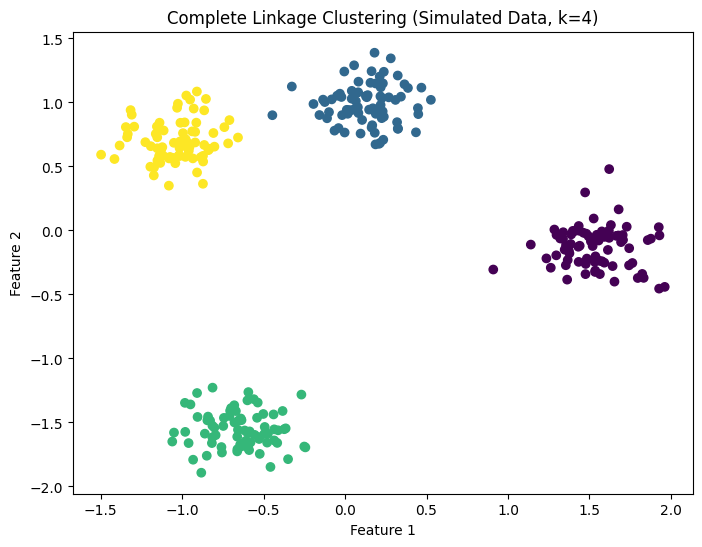

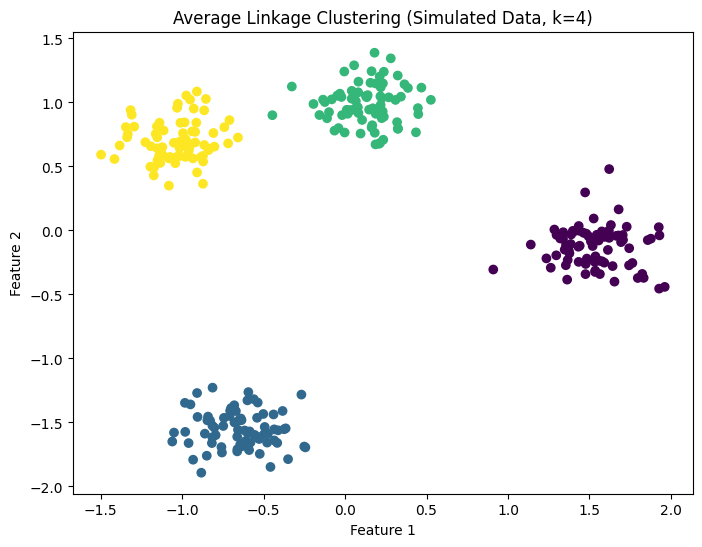

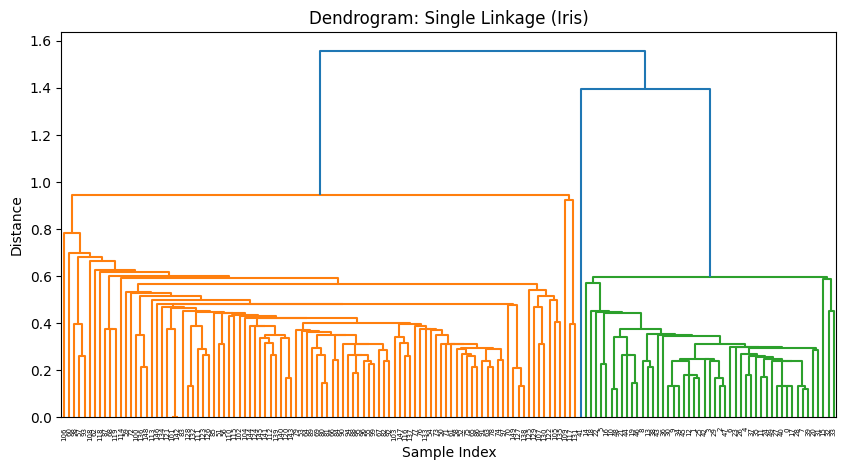

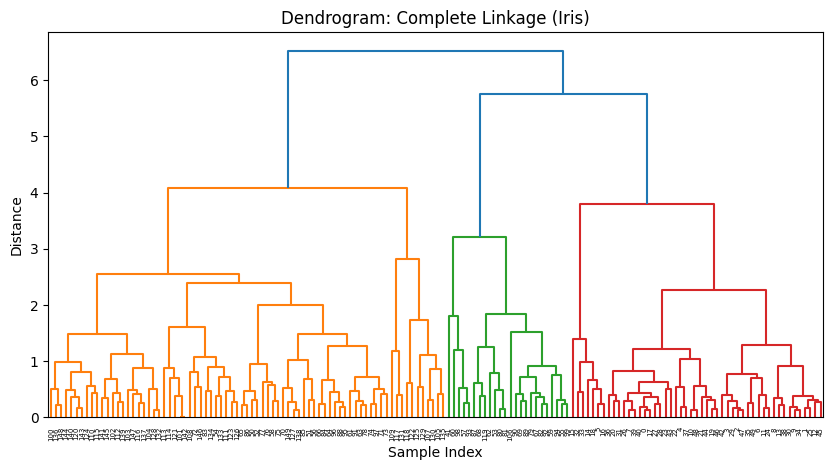

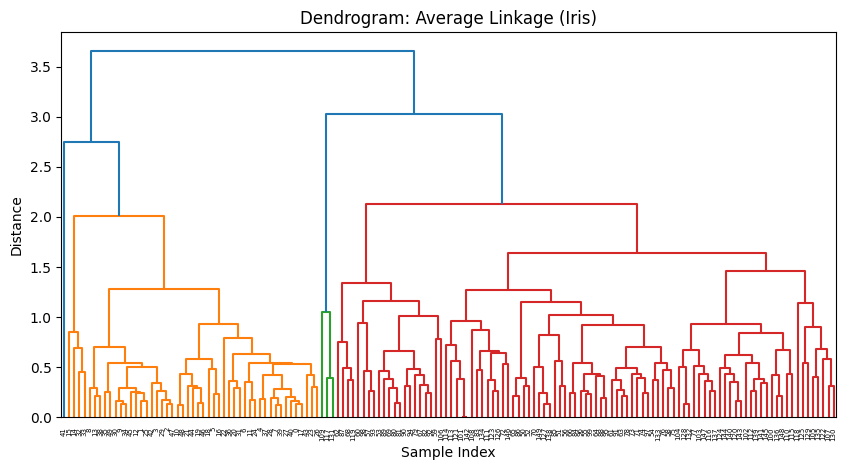

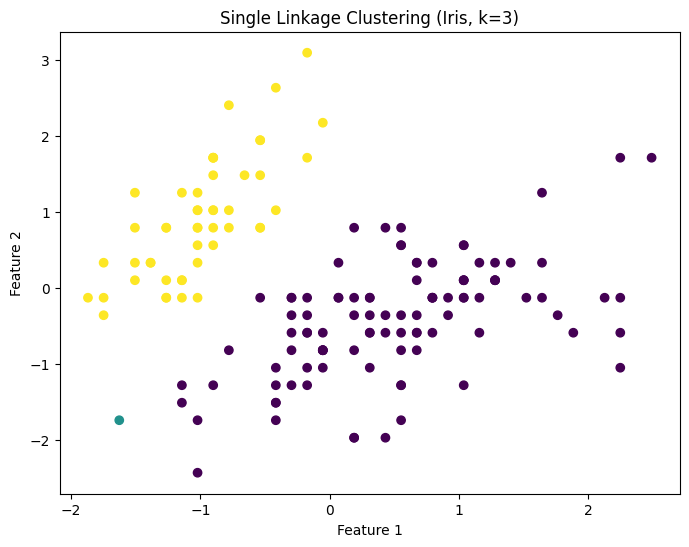

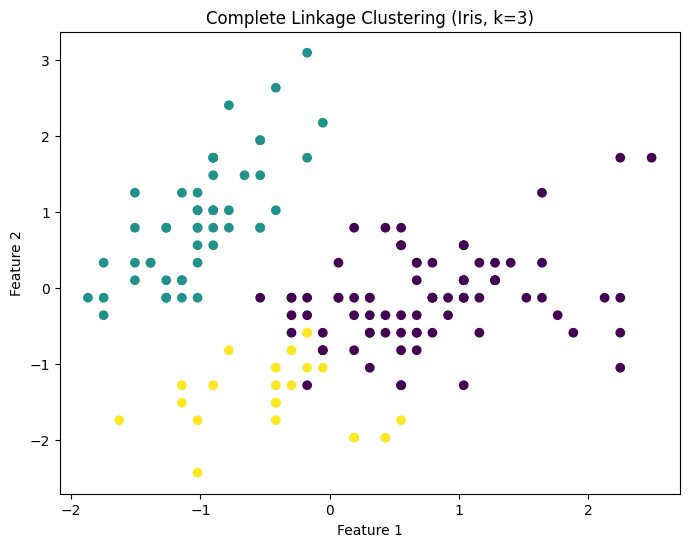

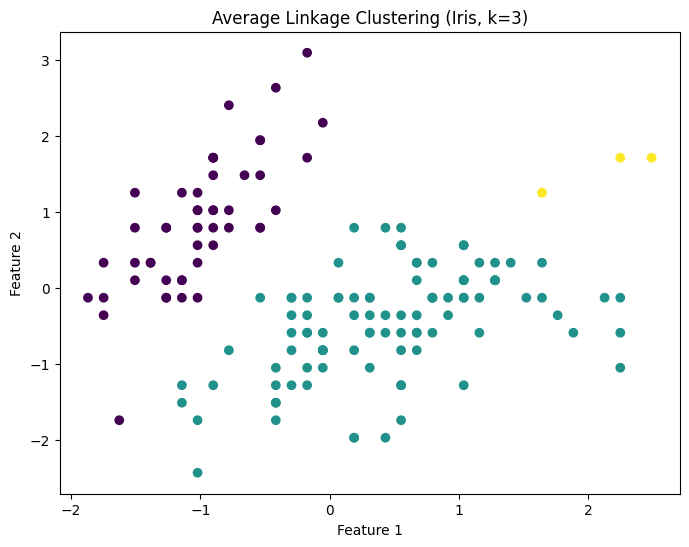

Running k-means Clustering...


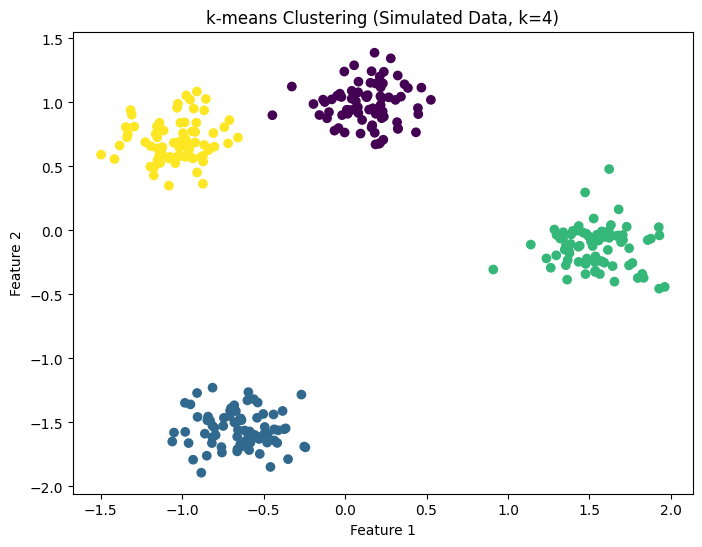

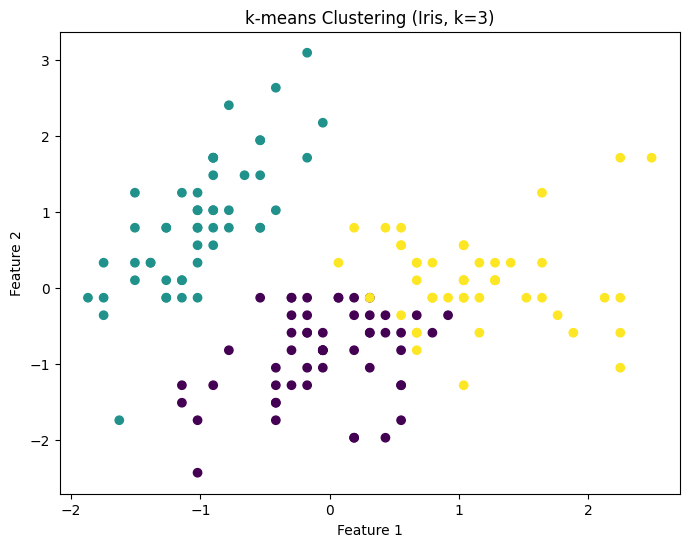

Running DBSCAN Clustering...


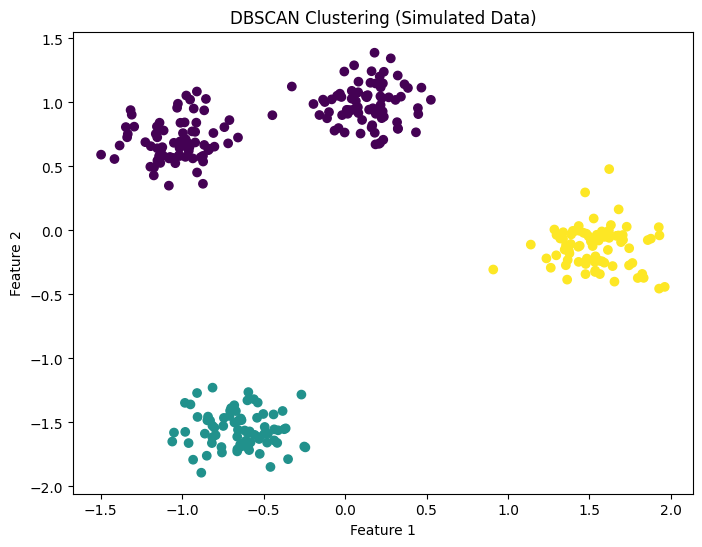

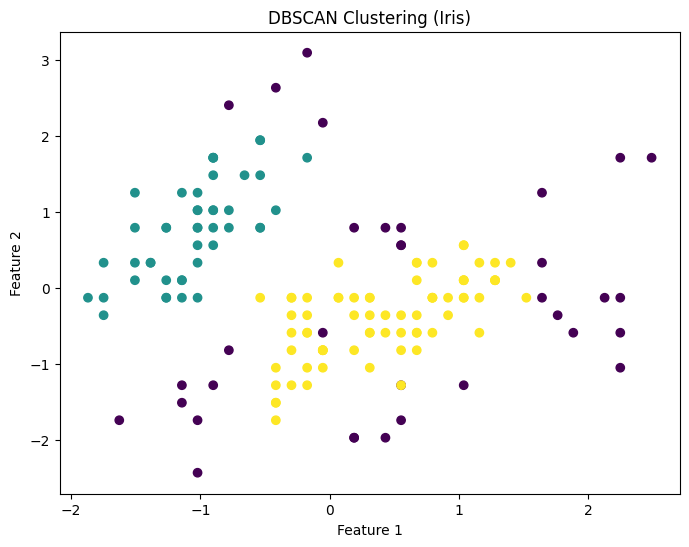

Running Gaussian Mixture Models...


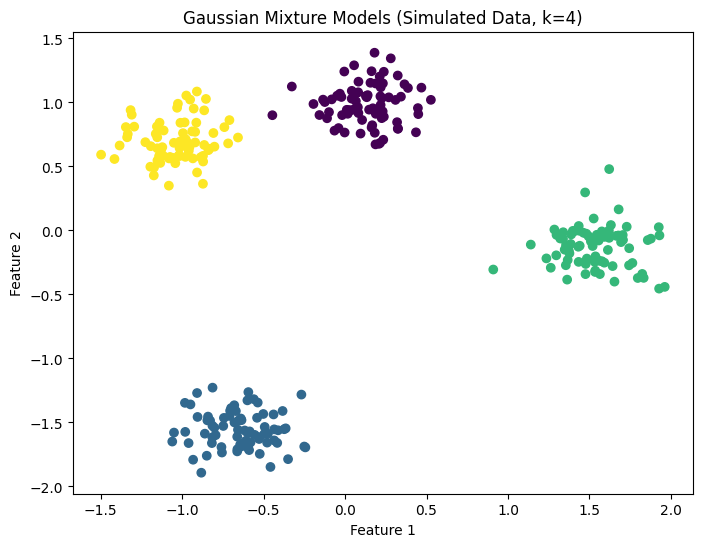

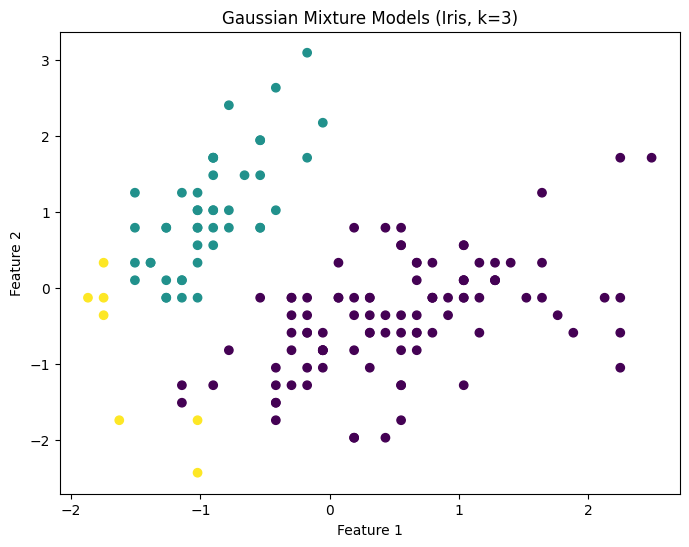


Notes:
- TIP and CBTR are not available in Python's standard libraries. They are implemented in the accompanying R Markdown file using the 'tip' package.
- Parameters (e.g., eps=0.5, min_samples=5 for DBSCAN) are tuned for these datasets. Adjust for other datasets as needed.
- Simulated data has 4 clusters; Iris has 3 known classes for benchmarking.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Set random seed for reproducibility
np.random.seed(42)

# Generate simulated data (4 clusters)
X_sim, y_sim = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Standardize features
scaler = StandardScaler()
X_sim_scaled = scaler.fit_transform(X_sim)
X_iris_scaled = scaler.fit_transform(X_iris)

# Function to plot dendrogram for hierarchical clustering
def plot_dendrogram(X, method, title):
    linked = linkage(X, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(linked)
    plt.title(f'Dendrogram: {title}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Function to plot clustering results
def plot_clusters(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Hierarchical Clustering: Single, Complete, and Average Linkage
print("Running Hierarchical Clustering...")
# Simulated Data
plot_dendrogram(X_sim_scaled, 'single', 'Single Linkage (Simulated Data)')
plot_dendrogram(X_sim_scaled, 'complete', 'Complete Linkage (Simulated Data)')
plot_dendrogram(X_sim_scaled, 'average', 'Average Linkage (Simulated Data)')

hc_single = AgglomerativeClustering(n_clusters=4, linkage='single')
hc_comp = AgglomerativeClustering(n_clusters=4, linkage='complete')
hc_avg = AgglomerativeClustering(n_clusters=4, linkage='average')

y_hc_single_sim = hc_single.fit_predict(X_sim_scaled)
y_hc_comp_sim = hc_comp.fit_predict(X_sim_scaled)
y_hc_avg_sim = hc_avg.fit_predict(X_sim_scaled)

plot_clusters(X_sim_scaled, y_hc_single_sim, 'Single Linkage Clustering (Simulated Data, k=4)')
plot_clusters(X_sim_scaled, y_hc_comp_sim, 'Complete Linkage Clustering (Simulated Data, k=4)')
plot_clusters(X_sim_scaled, y_hc_avg_sim, 'Average Linkage Clustering (Simulated Data, k=4)')

# Iris Data
plot_dendrogram(X_iris_scaled, 'single', 'Single Linkage (Iris)')
plot_dendrogram(X_iris_scaled, 'complete', 'Complete Linkage (Iris)')
plot_dendrogram(X_iris_scaled, 'average', 'Average Linkage (Iris)')

hc_single_iris = AgglomerativeClustering(n_clusters=3, linkage='single')
hc_comp_iris = AgglomerativeClustering(n_clusters=3, linkage='complete')
hc_avg_iris = AgglomerativeClustering(n_clusters=3, linkage='average')

y_hc_single_iris = hc_single_iris.fit_predict(X_iris_scaled)
y_hc_comp_iris = hc_comp_iris.fit_predict(X_iris_scaled)
y_hc_avg_iris = hc_avg_iris.fit_predict(X_iris_scaled)

plot_clusters(X_iris_scaled, y_hc_single_iris, 'Single Linkage Clustering (Iris, k=3)')
plot_clusters(X_iris_scaled, y_hc_comp_iris, 'Complete Linkage Clustering (Iris, k=3)')
plot_clusters(X_iris_scaled, y_hc_avg_iris, 'Average Linkage Clustering (Iris, k=3)')

# k-means Clustering
print("Running k-means Clustering...")
kmeans_sim = KMeans(n_clusters=4, random_state=42, n_init=25)
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=25)

y_kmeans_sim = kmeans_sim.fit_predict(X_sim_scaled)
y_kmeans_iris = kmeans_iris.fit_predict(X_iris_scaled)

plot_clusters(X_sim_scaled, y_kmeans_sim, 'k-means Clustering (Simulated Data, k=4)')
plot_clusters(X_iris_scaled, y_kmeans_iris, 'k-means Clustering (Iris, k=3)')

# DBSCAN Clustering
print("Running DBSCAN Clustering...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan_sim = dbscan.fit_predict(X_sim_scaled)
y_dbscan_iris = dbscan.fit_predict(X_iris_scaled)

plot_clusters(X_sim_scaled, y_dbscan_sim, 'DBSCAN Clustering (Simulated Data)')
plot_clusters(X_iris_scaled, y_dbscan_iris, 'DBSCAN Clustering (Iris)')

# Gaussian Mixture Models (MCLUST equivalent)
print("Running Gaussian Mixture Models...")
gmm_sim = GaussianMixture(n_components=4, random_state=42)
gmm_iris = GaussianMixture(n_components=3, random_state=42)

y_gmm_sim = gmm_sim.fit_predict(X_sim_scaled)
y_gmm_iris = gmm_iris.fit_predict(X_iris_scaled)

plot_clusters(X_sim_scaled, y_gmm_sim, 'Gaussian Mixture Models (Simulated Data, k=4)')
plot_clusters(X_iris_scaled, y_gmm_iris, 'Gaussian Mixture Models (Iris, k=3)')

print("""
Notes:
- TIP and CBTR are not available in Python's standard libraries. They are implemented in the accompanying R Markdown file using the 'tip' package.
- Parameters (e.g., eps=0.5, min_samples=5 for DBSCAN) are tuned for these datasets. Adjust for other datasets as needed.
- Simulated data has 4 clusters; Iris has 3 known classes for benchmarking.
""")